# Classification

## Overview
In this exercise, we'll use the famous - if simple - Iris flower dataset and a more complex Seeds dataset to understand **Classification**.

## Definition
**Classification** is a supervised learning algorithm that learns from a labelled dataset to correlate labels with other features, and predicts the labels for new data.

## Iris Dataset
The **scikit-learn** module comes with a number of pre-packaged datasets, including the Iris flower dataset:

In [41]:
%pylab inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

Populating the interactive namespace from numpy and matplotlib
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ====

In [42]:
# The feature names:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
# The numeric features values are in iris.data in the same order as iris.feature_names
iris.data.shape

(150, 4)

In [44]:
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [45]:
# The class labels are in iris.target_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [46]:
# The class label of each row is in iris.target as an index into the "iris.target_names" list
iris.target.shape

(150,)

In [47]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Visualizing variable correlations with scatter plot pairs

The dataset has 4 features, yielding $^4C_2$ = 6 variable pairs.

In [61]:
# Basic sanity checks
data = iris.data
labels = iris.target

print sum(np.isnan(data[:,0]))
print sum(np.isnan(data[:,1]))
print sum(np.isnan(data[:,2]))
print sum(np.isnan(data[:,3]))
print sum(np.isnan(labels[:]))

0
0
0
0
0


So, the dataset is clean without any NaNs.

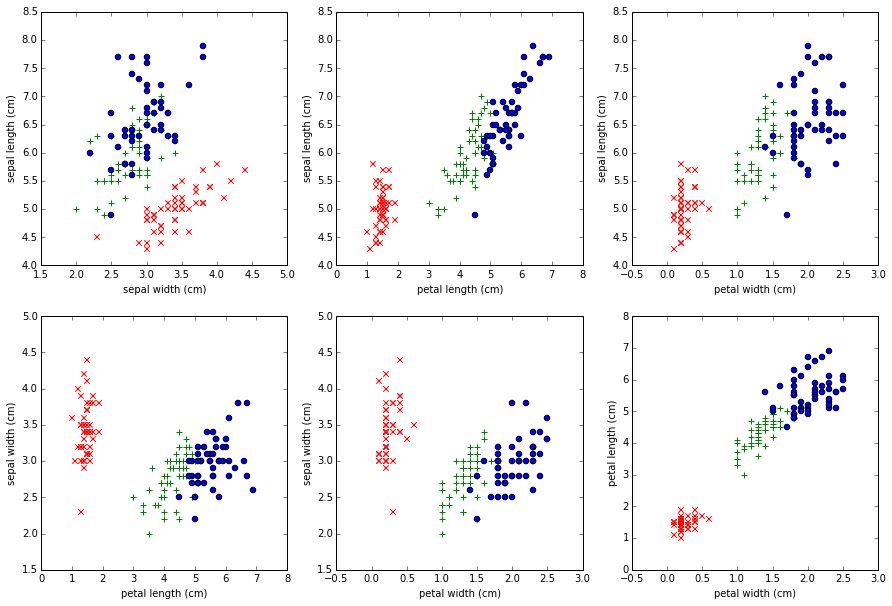

In [81]:
mpl.rcParams['figure.figsize'] = [15.0, 10.0]

subplot_number = 1

# Plot the scatter plot matrix.
# An alternative one liner for this is using pandas and seaborn:  pd.scatter_matrix() 
for vert_feature in xrange(0, len(iris.feature_names)):
    for horz_feature in xrange(vert_feature+1, len(iris.feature_names)):
        x = data[:, horz_feature]
        y = data[:, vert_feature]
        
        plt.subplot(2, 3, subplot_number)
        plt.xlabel(iris.feature_names[horz_feature])
        plt.ylabel(iris.feature_names[vert_feature])
        
        # In each subplot, plot labels with different markers and colors.
        # Since there 3 labels, each subplot is actually 3 different scatter plots
        # based on labels.
        # setosa (label=0) -> red 'x' marks
        # versicolor (label=1) -> green '+' marks
        # virginica (label=2) -> blue 'o' marks
        colors = ['r', 'g', 'b']
        markers = ['x', '+', 'o']
        for label in xrange(0, len(iris.target_names)):
            x_label = x[labels==label]
            y_label = y[labels==label]
          
            plt.scatter(x_label, y_label, s=30, marker=markers[label], c=colors[label])
        
        subplot_number += 1

We can make some observations from these visualizations:

+ Setosas stand out because of their short petal widths and petal lengths (see last plot).

+ Petal widths can distinguish between versicolors and virgincas. In all the subplots with petal widths, the greens and blues are distinctly clustered with not much overlap at all.

+ We can find threshold values for these features which help us classify a flower. But that would be an example of **rule based programming** rather than machine learning. In machine learning, we want the algorithm to come up with the decision boundaries instead of calculating them manually or visually.